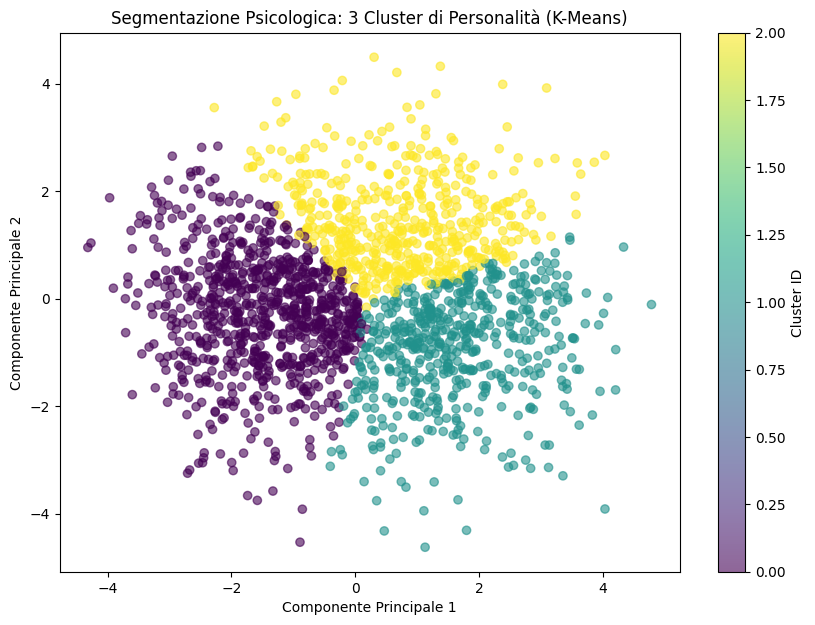


--- RISULTATO DEL CLUSTERING ---
Percentuale di consumatori di Cannabis per ogni gruppo psicologico:
Cluster
0    40.095465
1    92.393321
2    84.842520
Name: Uses_Cannabis, dtype: float64
------------------------------


In [2]:
!pip install ucimlrepo -q
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

drug_consumption = fetch_ucirepo(id=373)
X = drug_consumption.data.features
targets = drug_consumption.data.targets.copy()

targets_binary = targets.replace(
    {'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Segmentazione Psicologica: 3 Cluster di Personalità (K-Means)")
plt.xlabel("Componente Principale 1")
plt.ylabel("Componente Principale 2")
plt.colorbar(scatter, label='Cluster ID')
plt.show()

X_with_cluster = X.copy()
X_with_cluster['Cluster'] = clusters
X_with_cluster['Uses_Cannabis'] = targets_binary['cannabis']

analysis = X_with_cluster.groupby('Cluster')['Uses_Cannabis'].mean() * 100

print("\n--- RISULTATO DEL CLUSTERING ---")
print(f"Percentuale di consumatori di Cannabis per ogni gruppo psicologico:")
print(analysis)
print("-" * 30)